# Multi-messenger astronomy in the context of the VO framework.

### Partecipant project for the [second ESCAPE Virtual Observatory School](https://indico.in2p3.fr/event/25225/): a practical example using  the Multi Order Coverage maps in Python.
##### Maria Lisa Brozzetti; marialisa.brozzetti@studenti.unipg.it

The tutorial aims to analyze the [first multi-messenger event, GW170817/GRB170817/AT2017gfo](https://www.ligo.org/science/Publication-GW170817MMA/index.php) using the Multi Order Coverage map (MOC) to encode the gravitational-wave sky localizations from the LIGO and Virgo collaborations, and the gamma-ray-burst error boxes provided by the GBM instrument on board the Fermi Gamma-Ray Space Telescope and calculate from the IPN triangulation using the delay between Fermi and INTEGRAL. 

In [1]:
import matplotlib.pyplot as plt

import mocpy
from mocpy import MOC, STMOC, WCS

import astropy
from astropy.coordinates import SkyCoord, Angle, Longitude, Latitude

from astropy.time import Time
import astropy.units as u

import healpy as hp

## 1. Encoding of 2D credible regions in a MOC map


## 1.1 Download the sky maps


In [2]:
# Initial sky localization with the two LIGO interferometers (L1+H1).
!curl -O https://dcc.ligo.org/public/0146/G1701985/001/bayestar_no_virgo.fits.gz

# Initial sky localization with the two LIGO + Virgo (L1+H1+V1).
!curl -O https://dcc.ligo.org/public/0146/G1701985/001/bayestar.fits.gz
    
# Final sky localization published in the (GWTC-1).
!curl -O https://dcc.ligo.org/public/0157/P1800381/007/GW170817_skymap.fits.gz
    
### Fermi/GBM localization of GRB 170817A
!curl -O https://gammaray.nsstc.nasa.gov/gbm/science/grbs/grb170817a/gbuts_healpix_systematic.fit  

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1592k  100 1592k    0     0   798k      0  0:00:01  0:00:01 --:--:--  800k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4469k  100 4469k    0     0   374k      0  0:00:11  0:00:11 --:--:--  874k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1453k  100 1453k    0     0   755k      0  0:00:01  0:00:01  0:00:02  446k0:01 --:--:--  756k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1549k  100 1549k    0     0   529k      0  0:00:02  0:00:02 --:--:--  530k


## 1.2 Create credible regions encoded with MOC

From [ligo.skymap](https://lscsoft.docs.ligo.org/ligo.skymap/), it is possible to invoke the command-line [ligo-skymap-contour-moc](https://lscsoft.docs.ligo.org/ligo.skymap/tool/ligo_skymap_contour_moc.html). The method returns a credible level encoded in a MOC data structure of an all-sky probability map in FITS format. The method is based on [mocpy](https://cds-astro.github.io/mocpy/). 

Recently, the [mocpy version 0.10.0](https://cds-astro.github.io/mocpy/) builds the credibility regions with an algorithm that has various options, including one which produces the same results as
Aladin Desktop (see a tutorial [here](https://indico.in2p3.fr/event/25225/sessions/15780/attachments/69008/97180/MMA_Aladin_v1a_comp.pdf)), and others that allow for different handling of the
region boundaries. The method is [from_multiordermap_fits_file](https://cds-astro.github.io/mocpy/stubs/mocpy.MOC.html#mocpy.MOC.from_multiordermap_fits_file) method. This method digests only sky maps in the [multi-order format](https://emfollow.docs.ligo.org/userguide/tutorial/multiorder_skymaps.html) (in
which different HEALPix orders are included). To convert a standard HEALPix
format (where all the cells are at a single order) into a multi-order format, the command-line [ligo-skymap-unflatten](https://lscsoft.docs.ligo.org/ligo.skymap/tool/ligo_skymap_unflatten.html) can be applied.

In [3]:
# Credible region (90%) with the two LIGO interferometers (L1+H1).
!ligo-skymap-contour-moc  'bayestar_no_virgo.fits.gz' -c 90  --output 'credible_region_2ifos'

# Credible region (90%) with the two LIGO + Virgo (L1+H1+V1).
!ligo-skymap-contour-moc  'bayestar.fits.gz' -c 90  --output 'credible_region_3ifos'

# Credible region (90%) - final sky localization published in the (GWTC-1).
!ligo-skymap-contour-moc  'GW170817_skymap.fits.gz' -c 90  --output 'credible_region_final'

# Credible region (90%) Fermi/GBM localization of GRB 170817A
!ligo-skymap-contour-moc  'gbuts_healpix_systematic.fit' -c 90  --output 'fermi_gbm'

/Users/gius/miniconda3/lib/python3.8/site-packages/mocpy/moc/moc.py:743: UserWarning: To avoid an extra loop, it is preferable to provide the max_depth parameter.It will probably become mandatory in future releases.
  warnings.warn(
/Users/gius/miniconda3/lib/python3.8/site-packages/mocpy/moc/moc.py:743: UserWarning: To avoid an extra loop, it is preferable to provide the max_depth parameter.It will probably become mandatory in future releases.
  warnings.warn(
/Users/gius/miniconda3/lib/python3.8/site-packages/mocpy/moc/moc.py:743: UserWarning: To avoid an extra loop, it is preferable to provide the max_depth parameter.It will probably become mandatory in future releases.
  warnings.warn(
/Users/gius/miniconda3/lib/python3.8/site-packages/mocpy/moc/moc.py:743: UserWarning: To avoid an extra loop, it is preferable to provide the max_depth parameter.It will probably become mandatory in future releases.
  warnings.warn(


### 1.2.1 IPN triangulation

TITLE:   GCN CIRCULAR

NUMBER:  21515

SUBJECT: LIGO/Virgo G298048: IPN triangulation of Fermi/GBM trigger 524666471/170817529

DATE:    17/08/17 18:35:12 GMT

FROM:    Dmitry Svinkin at Ioffe Institute  <svinkin@mail.ioffe.ru>

D. Svinkin, K. Hurley, on behalf of the IPN,

A. von Kienlin, X. Zhang, A. Rau, V. Savchenko, E. Bozzo,
and C. Ferrigno, on behalf of the INTEGRAL SPI-ACS GRB team,

V. Connaughton, M. S. Briggs, C. Meegan, V. Pelassa,
and A. Goldstein, on behalf of the Fermi GBM team, report:

A short-duration burst (Connaughton, LVC GCN Circ. 21506)
has been detected by Fermi (GBM; trigger 524666471),
and INTEGRAL (SPI-ACS), so far, at about 45666 s UT (12:41:06).

We have triangulated it to a GBM-INTEGRAL annulus centered at 
**RA(2000)=119.131deg** (07h 56m 31s)  **Dec(2000)=-44.133deg** (-44d 07' 
57"), whose radius is 73.554 +/- 19.687 deg (3 sigma). The annulus is 
consistent with the Fermi-GBM ground position 
(glg_loclist_all_bn170817529_v01.txt).

This annulus may be improved.

A triangulation map is posted at
http://www.ioffe.ru/LEA/GRBs/GRB170817_T45666/IPN/

In [4]:
# Creating the MOC annulus provided by IPN.
ipn = MOC.from_ring(lon=Longitude(119.131 * u.deg),lat=Latitude(-44.133 * u.deg),
                         internal_radius=Angle(53.867, u.deg),
                         external_radius=Angle(93.241, u.deg),
                         max_depth=10)

# Save in fits format.
ipn.write("ipn_triangulation", overwrite=True)

## 2. Plotting using Matplotlib

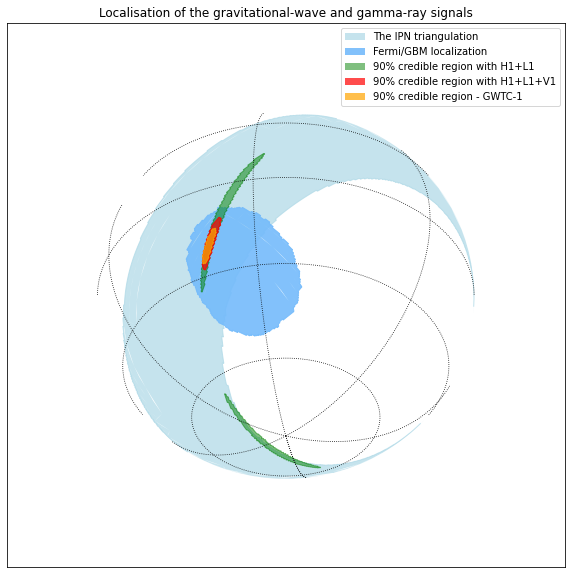

In [5]:
fig = plt.figure(111, figsize=(10, 10))

with WCS(fig, fov=170 * u.deg,
                     center=SkyCoord(170.0, -40.0, 
                                     unit='deg', frame='icrs'),
                     coordsys="icrs",
                     rotation=Angle(0, u.degree),
                     projection='SIN') as wcs:
    ax = fig.add_subplot(1, 1, 1, projection=wcs)
    
    # Loading MOC IPN annulus
    ipn_triangulation = MOC.load("ipn_triangulation")
    
    # Plot IPN annulus
    ipn_triangulation.fill(ax=ax, wcs=wcs, alpha=0.7,linewidth=0, fill=True, 
                           color='lightblue', 
                           label='The IPN triangulation')
    ipn_triangulation.border(ax=ax, wcs=wcs, alpha=0.7, color="lightblue")

    # Load Fermi/GBM error box of GRB 170817
    fermi_gbm = MOC.load("fermi_gbm")
    
    # Plot Fermi/GBM error box of GRB 170817
    fermi_gbm.fill(ax=ax, wcs=wcs, alpha=0.9,linewidth=0, fill=True, 
                   color="#74bbfb", 
                   label='Fermi/GBM localization')
    fermi_gbm.border(ax=ax, wcs=wcs, alpha=0.9, color="#74bbfb")
        
    # Loading L1+H1 MOC credible region
    credible_region_2ifos = MOC.load("credible_region_2ifos")
    
    # Plot L1+H1 credible region
    credible_region_2ifos.fill(ax=ax, wcs=wcs, alpha=0.5,linewidth=0, fill=True, 
                               color='green', 
                               label='90% credible region with H1+L1')
    credible_region_2ifos.border(ax=ax, wcs=wcs, alpha=0.5, color="green")
    
    # Loading L1+H1+V1 MOC credible region
    credible_region_3ifos = MOC.load("credible_region_3ifos")
    
    # Plot L1+H1+V1 credible region
    credible_region_3ifos.fill(ax=ax, wcs=wcs, alpha=0.7,linewidth=0, fill=True, 
                               color="red", 
                               label='90% credible region with H1+L1+V1')
    credible_region_3ifos.border(ax=ax, wcs=wcs, alpha=0.8, color="red")
             
    # Loading MOC credible region (90%) (GWTC-1).
    credible_region_final = MOC.load("credible_region_final")
    
    # Plot credible region (90%) - published in the (GWTC-1).
    credible_region_final.fill(ax=ax, wcs=wcs, alpha=0.7,linewidth=0, 
                               fill=True, color="orange", 
                               label='90% credible region - GWTC-1')
    credible_region_final.border(ax=ax, wcs=wcs, alpha=0.7, color="orange")
    
#    print('The intersection sky area is {:.2f} sq. deg.'.format(intersection_area))
    
    ax.legend()
    plt.title('Localisation of the gravitational-wave and gamma-ray signals')
    
    plt.grid(color="black", linestyle="dotted")
    plt.show()

## 3. Areas and disjoint regions

In [6]:
area_2ifo = round(credible_region_2ifos.sky_fraction*41253,2)
print("The Area (90%) with L1 and H1: " + str(area_2ifo) +'°^2' )
print("The number of the disjoint regions: " + 
      str(credible_region_2ifos.split_count()))
print()

area_3ifo = round(credible_region_3ifos.sky_fraction*41253,2)
print("The Area (90%) with L1, H1 and V1: " + str(area_3ifo) +'°^2' )
print("The number of the disjoint regions: " + 
      str(credible_region_3ifos.split_count()))
print()

area_final = round(credible_region_final.sky_fraction*41253,2)
print("The Area (90%) in the final analysis: " + str(area_final) +'°^2' )
print("The number of the disjoint regions: " + 
      str(credible_region_final.split_count()))

The Area (90%) with L1 and H1: 187.32°^2
The number of the disjoint regions: 2

The Area (90%) with L1, H1 and V1: 30.98°^2
The number of the disjoint regions: 1

The Area (90%) in the final analysis: 16.16°^2
The number of the disjoint regions: 1


/Users/gius/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
credible_region_2ifos.split_count()

2

## 4. Interactive visualization using ipyladin widgets

In [8]:
from ipyaladin import Aladin
import ipyaladin as ipyal

aladin = ipyal.Aladin(target='NGC 4993', fov=180, survey ='P/DSS2/color')
aladin

/Users/gius/miniconda3/lib/python3.8/site-packages/ipyaladin/aladin_widget.py:109: DeprecationWarning: Traits should be given as instances, not types (for example, `Int()`, not `Int`). Passing types is deprecated in traitlets 4.1.
  options = List(trait=Unicode).tag(sync=True)


Aladin(fov=180.0, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', '…

Scroll up and visualize the credible region contours in the interactive Aladin widgets. From the `Manage Layers` <img src="https://github.com/ggreco77/Tutotest/blob/main/images/ipyaladin_layer.png?raw=true" alt="the Layer Button" style="width:30px; display: inline-block;"/> the credible regions can be independently selected. 

If you hover the mouse pointer over a credible region plan a message will be displayed above it to show the **coverage in sky percentage**.

In [9]:
# Show the two credible regions in the Aladin widget with 2 different colors.
colors = [ "lightblue", "#74bbfb", "green", "red", "orange"]

credible_regions = ["ipn_triangulation", "fermi_gbm", "credible_region_2ifos",
                   "credible_region_3ifos", "credible_region_final"]

for credible_region, color in zip(credible_regions, colors):
    aladin.add_moc_from_URL(credible_region, {'color': color, 'opacity': 0.7,
                            'adaptativeDisplay': False, 'name':credible_region})

## 4.1 Gravitational-wave sky localization and GRB error box

In [10]:
from ipywidgets import Layout, Box, widgets

# Initialize the boxes
left_box = Aladin(layout=Layout(width='50%'), target='NGC 4993', fov=180,survey='P/DSS2/color')
right_box = Aladin(layout=Layout(width='50%'))

# Synchronize target between 3 widgets
widgets.jslink((left_box, 'target'), (right_box, 'target'))
# Synchronize FoV (zoom level) between 2 widgets
widgets.jslink((left_box, 'fov'), (right_box, 'fov'))

items = [left_box,right_box]

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    border='solid',
                    width='100%')
box = Box(children=items, layout=box_layout)
box

Box(children=(Aladin(fov=180.0, layout=Layout(width='50%'), options=['allow_full_zoomout', 'coo_frame', 'fov',…

In [11]:
left_box.add_moc_from_URL('fermi_gbm' ,{'color': '#74bbfb' , 'opacity': 0.7,
                            'adaptativeDisplay': False, 'name': 'Fermi/GBM error box of GRB 170817' })

right_box.add_moc_from_URL('credible_region_final', {'color': 'orange', 'opacity': 0.7, 
                                      'adaptativeDisplay': False, 'name': 'Sky localization of GW170817' })

## 5. Spatial and Temporal intersection
**Two astrophysics events are considered coincident if they are within a particular time window of each other**.


Following the [LIGO-Virgo Pubic Alert User Guide](https://emfollow.docs.ligo.org/userguide/index.html) in the section [Coincident with External Trigger Search](https://emfollow.docs.ligo.org/userguide/analysis/searches.html#coincident-with-external-trigger-search), we use the time window from -1 s to 5 s around the GW time. It means that we take into account GRBs up to one
second before or up to 5 seconds after the GW time. Following this prescription, the temporal interval to define the Space and Time MOC ranges from **2017-08-17T12:41:03 UTC to 2017-08-17T12:41:09 UTC**.

In the case of the GRB 170817, we added the trigger time reported in [An Ordinary Short Gamma-Ray Burst with
Extraordinary Implications: Fermi-GBM Detection of GRB 170817A](https://iopscience.iop.org/article/10.3847/2041-8213/aa8f41). The event was observed on 2017 August 17 at
12:41:06 UTC triggered by the Fermi gamma-ray Burst Monitor (GBM). T90 is 2.0   0.5 s, starting at T0 − 0.192 s. With these values, we set an approximate time window from **2017-08-17T12:41:05.80 UTC to 2017-08-17T12:41:07.80 UTC**.

In [12]:
# Create a Space and Time MOC from the gravitational-wave sky localization
stmoc_gw170817 = STMOC.from_spatial_coverages(Time(['2017-08-17T12:41:03'], 
                                                   format="isot",  scale="utc"), 
                                              Time(['2017-08-17T12:41:09'], 
                                                   format="isot",  scale="utc"),
                                              [credible_region_final],time_depth=61)

# Create a Space and Time MOC from the GRB error boxes from Fermi/GBM
stmoc_grb170817 = STMOC.from_spatial_coverages(Time(['2017-08-17T12:41:05.80'], 
                                                    format="isot",  scale="utc"), 
                                               Time(['2017-08-17T12:41:07.80'], 
                                                    format="isot",  scale="utc"),
                                               [fermi_gbm], time_depth=61)

# Compute their space and time intersection and check that it is not empty
space_time_intersection_gw_grb = stmoc_grb170817.intersection(stmoc_gw170817)

if space_time_intersection_gw_grb.is_empty() != True:

    print("The time intersection between GW and GRB events ranges from:", 
          space_time_intersection_gw_grb.min_time.utc.iso +
          ' to ' + space_time_intersection_gw_grb.max_time.utc.iso)
    print()
    # Compute their space intersection 
    space_intersection_gw_grb = fermi_gbm.intersection(credible_region_final)
    area_int = round(space_intersection_gw_grb.sky_fraction*41253,2)
    
    print("The area intersection is: " + str(area_int) +'°^2' )
    print("The number of the disjoint regions: " + 
      str(space_intersection_gw_grb.split_count()))
    
    # Save in a FITS file
    space_intersection_gw_grb.write("space_intersection_gw_grb", format='fits',
                                  overwrite=True)
    
else:
    print("The two astrophysical events are not coincident")

The time intersection between GW and GRB events ranges from: 2017-08-17 12:41:05.800 to 2017-08-17 12:41:07.800

The area intersection is: 16.16°^2
The number of the disjoint regions: 1


/Users/gius/miniconda3/lib/python3.8/site-packages/mocpy/serializer.py:70: DeprecationWarning: This method is deprecated. Use MOC.save(path, "fits") instead!
  warnings.warn(


## 6. Query Vizier catalogs
Here we query the galaxies collected in the [GLADE](https://ui.adsabs.harvard.edu/abs/2016yCat.7275....0D/abstract) catalog inside the intersection area between the GW170817 and GRB 170817. Then, we filter those galaxies according to the marginal distance posterior distribution integrated over the whole sky. The value reported in the header of GW170817 published in GWTC-1 [GW170814_skymap.fits.gz](https://dcc.ligo.org/public/0157/P1800381/007/GW170817_skymap.fits.gz).

In [13]:
url_GW170814_skymap = "https://dcc.ligo.org/public/0157/P1800381/007/GW170817_skymap.fits.gz"
prob, header = hp.read_map(url_GW170814_skymap, h=True)

header = dict(header)
print(header)
print()

print('Posterior mean distance (Mpc):', + header['DISTMEAN'])
print('Posterior standard deviation of distance (Mpc):', + header['DISTSTD'])

{'XTENSION': 'BINTABLE', 'BITPIX': 8, 'NAXIS': 2, 'NAXIS1': 32, 'NAXIS2': 12582912, 'PCOUNT': 0, 'GCOUNT': 1, 'TFIELDS': 4, 'TTYPE1': 'PROB', 'TFORM1': 'D', 'TUNIT1': 'pix-1', 'TTYPE2': 'DISTMU', 'TFORM2': 'D', 'TUNIT2': 'Mpc', 'TTYPE3': 'DISTSIGMA', 'TFORM3': 'D', 'TUNIT3': 'Mpc', 'TTYPE4': 'DISTNORM', 'TFORM4': 'D', 'TUNIT4': 'Mpc-2', 'PIXTYPE': 'HEALPIX', 'ORDERING': 'NESTED', 'COORDSYS': 'C', 'NSIDE': 1024, 'INDXSCHM': 'IMPLICIT', 'OBJECT': 'GW170817', 'DATE-OBS': '2017-08-17T12:41:04.429464', 'MJD-OBS': 57982.52852348908, 'DATE': '2019-05-08T21:51:56.613850', 'CREATOR': 'ligo-skymap-from-samples', 'ORIGIN': 'LIGO/Virgo', 'DISTMEAN': 38.03408225450563, 'DISTSTD': 7.499686641911211, 'VCSVERS': 'ligo.skymap 0.0.15', 'VCSREV': '65fc6500a1e117fec2e27550a8e9b10c9792ffca', 'DATE-BLD': '2018-09-04T14:19:20', 'HISTORY': 't'}

Posterior mean distance (Mpc): 38.03408225450563
Posterior standard deviation of distance (Mpc): 7.499686641911211


In [14]:
table = space_intersection_gw_grb.query_vizier_table('VII/281/glade2')
table

_RAJ2000,_DEJ2000,PGC,GWGC,HyperLEDA,_2MASS,SDSS-DR12,Flag1,RAJ2000,DEJ2000,Dist,z,Bmag,BMAG,Jmag,Hmag,Kmag,Flag2,Flag3
deg,deg,,,,,,,deg,deg,Mpc,,mag,mag,mag,mag,mag,,
float64,float64,int32,str28,str29,str16,str18,str1,float64,float64,float64,float64,float32,float64,float32,float32,float32,str1,str1
194.9859999999999616,-19.4113900000000044,44681,PGC044681,PGC044681,---,---,G,194.98599999999999,-19.41139000000000,10.72210174250000,0.002498581249290,17.000,--,--,--,--,2,0
194.3662569999999903,-19.6912979999999997,44313,NGC4830,NGC4830,12572790-1941286,---,G,194.36625699999999,-19.69129800000000,48.87318502940000,0.011740000000000,12.961,-20.48440,9.911,9.184,8.942,3,1
196.8906399999999906,-24.0086059999999968,45466,NGC4970,NGC4970,13073375-2400309,---,G,196.89063999999999,-24.00860600000000,47.07325330160000,0.010276000000000,12.802,-20.56190,10.129,9.455,9.170,3,1
197.4487760000000094,-23.3838309999999971,45657,NGC4993,NGC4993,13094770-2323017,---,G,197.44877600000001,-23.38383100000000,39.35494484370000,0.012307000000000,13.160,-19.81500,10.292,9.599,9.330,3,1
197.0180049999999881,-23.7968440000000001,45514,IC4197,IC4197,13080432-2347486,---,G,197.01800499999999,-23.79684400000000,41.05862336570000,0.007911753955880,12.870,-20.19700,10.327,9.621,9.353,3,1
193.3634639999999933,-17.0054949999999998,43792,NGC4763,NGC4763,12532723-1700197,---,G,193.36346399999999,-17.00549500000000,56.56962474240000,0.012679000000000,13.089,-20.67390,10.632,9.965,9.700,3,1
196.7749019999999973,-23.6770400000000016,45426,NGC4968,NGC4968,13070597-2340373,---,G,196.77490200000000,-23.67704000000000,40.49351265710000,0.013487000000000,13.435,-19.60190,10.862,10.039,9.798,3,1
194.2982480000000010,-17.4095750000000002,--,---,44257,12571157-1724344,---,G,194.29824800000000,-17.40957500000000,208.19597963999999,0.029887000000000,14.254,-22.33840,11.049,10.343,9.971,3,1


In [15]:
# This is an expression for a 1-sigma cut on distance.
mask1 = table['Dist'] < header['DISTMEAN']+header['DISTSTD']
t1 = table[mask1]
mask2 = t1['Dist'] > header['DISTMEAN']-header['DISTSTD']
table_filtered = t1[mask2]
table_filtered

/Users/gius/miniconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


_RAJ2000,_DEJ2000,PGC,GWGC,HyperLEDA,_2MASS,SDSS-DR12,Flag1,RAJ2000,DEJ2000,Dist,z,Bmag,BMAG,Jmag,Hmag,Kmag,Flag2,Flag3
deg,deg,,,,,,,deg,deg,Mpc,,mag,mag,mag,mag,mag,,
float64,float64,int32,str28,str29,str16,str18,str1,float64,float64,float64,float64,float32,float64,float32,float32,float32,str1,str1
197.4487760000000094,-23.3838309999999971,45657,NGC4993,NGC4993,13094770-2323017,---,G,197.44877600000001,-23.38383100000000,39.35494484370000,0.012307000000000,13.160,-19.81500,10.292,9.599,9.330,3,1
197.0180049999999881,-23.7968440000000001,45514,IC4197,IC4197,13080432-2347486,---,G,197.01800499999999,-23.79684400000000,41.05862336570000,0.007911753955880,12.870,-20.19700,10.327,9.621,9.353,3,1
196.7749019999999973,-23.6770400000000016,45426,NGC4968,NGC4968,13070597-2340373,---,G,196.77490200000000,-23.67704000000000,40.49351265710000,0.013487000000000,13.435,-19.60190,10.862,10.039,9.798,3,1
196.2705539999999758,-22.3839469999999992,45241,ESO575-053,ESO575-053,13050493-2223022,---,G,196.27055400000000,-22.38394700000000,33.71243914990000,0.017150000000000,14.136,-18.50300,12.205,11.449,11.255,3,1
196.9072419999999966,-23.5789199999999965,45475,ESO508-010,ESO508-010,13073773-2334441,---,G,196.90724200000000,-23.57892000000000,45.19174966360000,0.012923000000000,14.216,-19.05930,12.272,11.503,11.303,3,1
197.6914060000000006,-23.8657280000000043,--,---,---,13104593-2351566,---,G,197.69140600000000,-23.86572800000000,38.72936502730000,0.014118000000000,14.461,-18.47920,12.568,11.932,11.622,3,1
197.4659999999999798,-24.2393699999999974,45666,ESO508-019,ESO508-019,---,---,G,197.46600000000001,-24.23937000000000,39.47225668990000,0.008937184468590,13.600,-19.38150,--,--,--,3,1
197.1769999999999641,-23.7757399999999990,797164,PGC797164,PGC797164,---,---,G,197.17699999999999,-23.77574000000000,36.55396281890000,0.009089224544610,15.220,-17.59470,--,--,--,2,1


In [16]:
from ipyaladin import Aladin
import ipyaladin as ipyal

aladin = ipyal.Aladin(target='NGC 4993', fov=180, survey ='P/DSS2/color')
aladin

Aladin(fov=180.0, options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', '…

In [17]:
aladin.add_table(table_filtered)
aladin.add_moc_from_URL('space_intersection_gw_grb' ,{'color': 'gold' , 'opacity': 0.2,
                            'adaptativeDisplay': False, 
                                        'name': 'Intersection area between GW170817 and GRB 170817'})

**NOTE.** Mocpy does not yet implement a galaxy catalog query by the three-dimensional posterior probability
distribution. However, it is currently possible in Aladin to search for galaxies within the 2D credible region on the sky and, afterwards, apply a distance cut that is independent of sky position. Dedicated functionalities
are provided in the Python library [ligo.skymap](https://lscsoft.docs.ligo.org/ligo.skymap/#).

In [ ]:
!pip3 show matplotlib

In [ ]:
!sudo pip3 install matplotlib -update

In [ ]:
!pip3 show ipyaladin

In [ ]:
from ipyaladin import Aladin

In [ ]:
aladin = Aladin(
    survey="http://alasky.cds.unistra.fr/DECaPS/DR1/color/",
    show_coo_grid=True,
    target="galactic center",
    coo_frame="galactic",
    fov=40,
    height=600
)
aladin